 Predicting Diabetes Onset Using Logistic Regression
   Dataset: 
Diabetes Dataset   
Preprocessing Steps:
Handle missing values if any.
Standardize features.
Encode categorical variables if any.
  Task:
Implement logistic regression to predict diabetes onset and evaluate the model using accuracy, precision, and recall.


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

data = pd.read_csv('diabetes.csv')

# Display the first few rows of the dataset and the column names
print(data.head())
print(data.columns)

data.columns = data.columns.str.strip()

 data.fillna(method='ffill', inplace=True)  # Uncomment if necessary

numerical_features = data.select_dtypes(include=['number']).columns.tolist()
]
target_column = 'Outcome'

if target_column not in data.columns:
    raise ValueError(f"Target column '{target_column}' not found in the dataset columns: {data.columns}")

X = data.drop(columns=target_column)
y = data[target_column]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=10000))
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')


IndentationError: unexpected indent (1902111124.py, line 21)

In [ ]:
2. Classifying Iris Species Using Decision Trees
   Dataset: 
Iris Dataset
   Preprocessing Steps:
Handle missing values if any.
Standardize features.
Encode categorical variables if any.
   Task: 
Implement a decision tree classifier to classify iris species and evaluate the model using confusion matrix and accuracy.


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64
Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


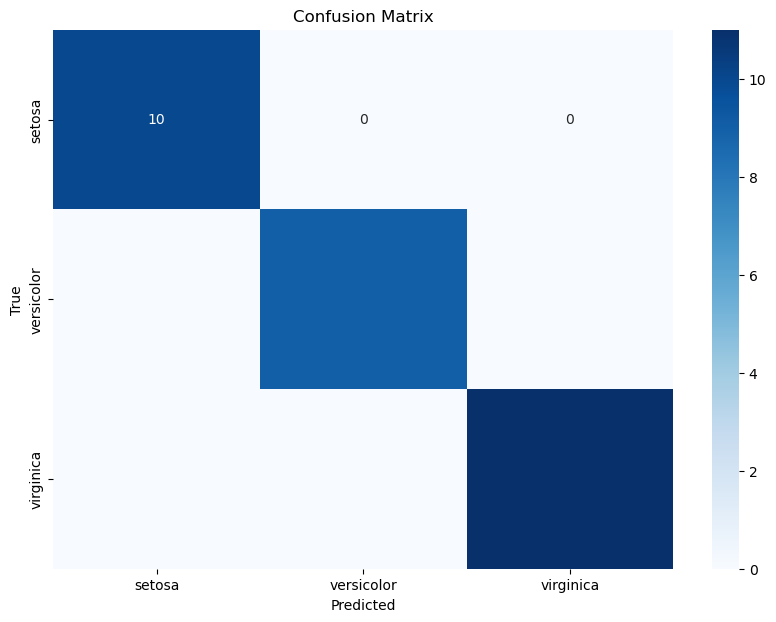

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

iris = load_iris(as_frame=True)
data = iris.frame

print(data.isnull().sum())

X = data.drop(columns='target')
y = data['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


3. Predicting Titanic Survival Using Logistic Regression
   Dataset: 
Titanic Dataset
   Preprocessing Steps:
Handle missing values (e.g., fill missing ages with median).
Encode categorical variables (e.g., one-hot encoding for embarked and gender).
Standardize numerical features.
   Task:
Implement logistic regression to predict survival on the Titanic and evaluate the model using ROC-AUC.


ROC-AUC Score: 0.8516819571865443


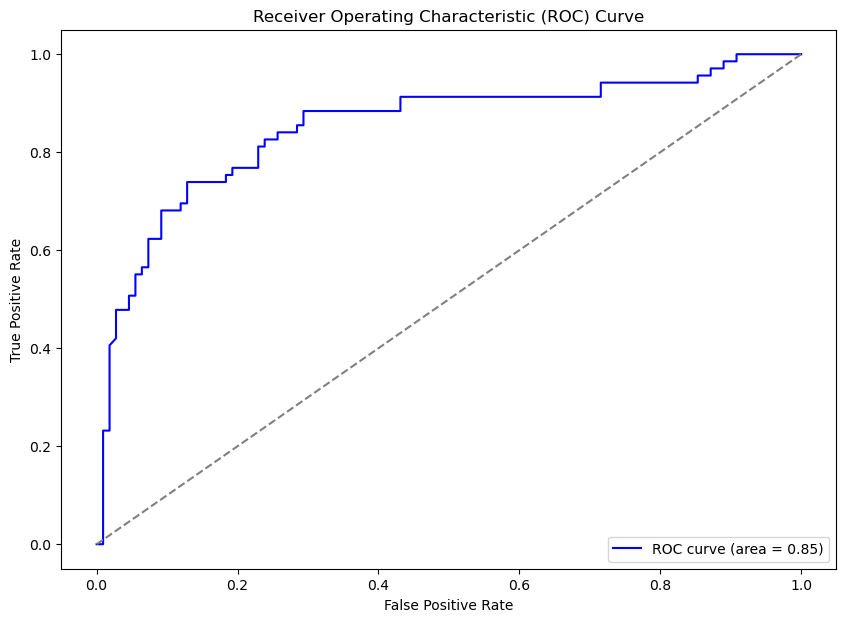

In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

data = pd.read_csv('titanic.csv')

data['Age'].fillna(data['Age'].median(), inplace=True)

data.dropna(subset=['Embarked'], inplace=True)
data['Fare'].fillna(data['Fare'].median(), inplace=True)

categorical_features = ['Embarked', 'Sex']
numerical_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

X = data.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin'])
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining the logistic regression model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=10000))
])

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

print(f'ROC-AUC Score: {roc_auc}')

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


4. Classifying Emails as Spam Using Decision Trees

Dataset: 
Spam Email Dataset
Preprocessing Steps:
Handle missing values if any.
Standardize features.
Encode categorical variables if present.
Task: 
Implement a decision tree classifier to classify emails as spam or not and evaluate the model using precision, recall, and F1-score.


In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

data = pd.read_csv('spam.csv')

categorical_features = data.select_dtypes(include=['object']).columns.tolist()
numerical_features = data.select_dtypes(include=['number']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ], remainder='passthrough')

X = data.drop(columns='spam')
y = data['spam']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

y_pred = model.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')


 Predicting Customer Satisfaction Using Logistic Regression
Dataset: 
Customer Satisfaction Dataset
Preprocessing Steps:
Handle missing values (e.g., fill missing values with median).
Encode categorical variables (e.g., one-hot encoding for region).
Standardize numerical features.
Task: 
Implement logistic regression to predict customer satisfaction and evaluate the model using accuracy and confusion matrix.


In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('customer_satisfaction.csv')

num_cols = data.select_dtypes(include=['number']).columns
data[num_cols] = data[num_cols].apply(lambda x: x.fillna(x.median()))

categorical_features = data.select_dtypes(include=['object']).columns.tolist()

numerical_features = data.select_dtypes(include=['number']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

X = data.drop(columns='satisfaction')
y = data['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=10000))
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()